<a href="https://www.kaggle.com/code/sharanharsoor/topic-modelling-nmf-lda-and-lsa?scriptVersionId=136998576" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction. 
Semantic processing in natural language processing (NLP), specifically topic modelling, plays a crucial role in extracting meaningful topics from a text corpus. When dealing with a collection of unstructured and unlabeled text from diverse sources, topic modelling aids in identifying the primary themes or labels within the content.

A prime illustration of its application is evident in customer review data analysis. Take, for instance, restaurant reviews, which can encompass various aspects such as different food items, varying lengths, and diverse sentiments. By employing a topic modelling algorithm, we can efficiently analyze each review and uncover the dominant themes and essential keywords. These extracted topics can then be showcased in a dedicated section referred to as "Review Highlights," as depicted in the accompanying image.

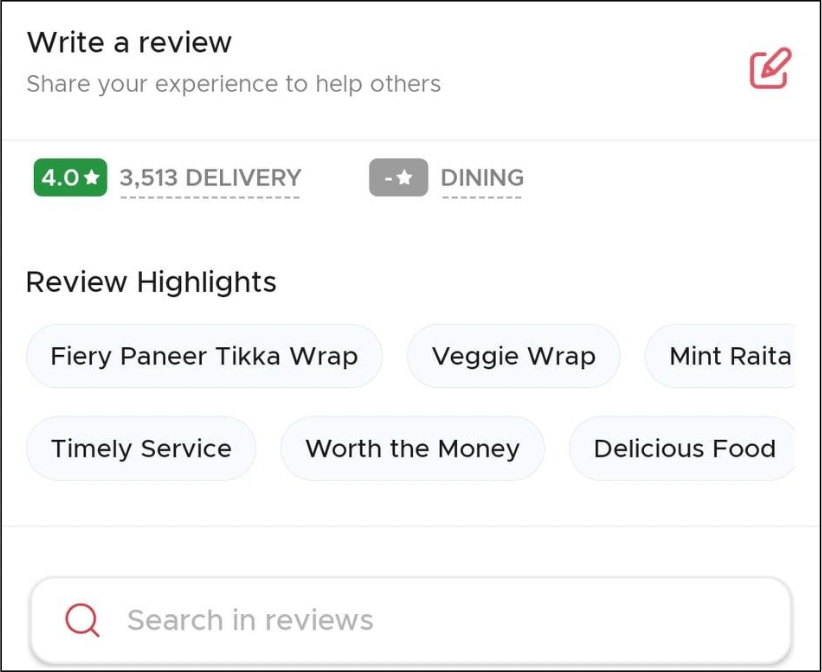

Let's take a look at a specific example to understand the working of topic modelling.

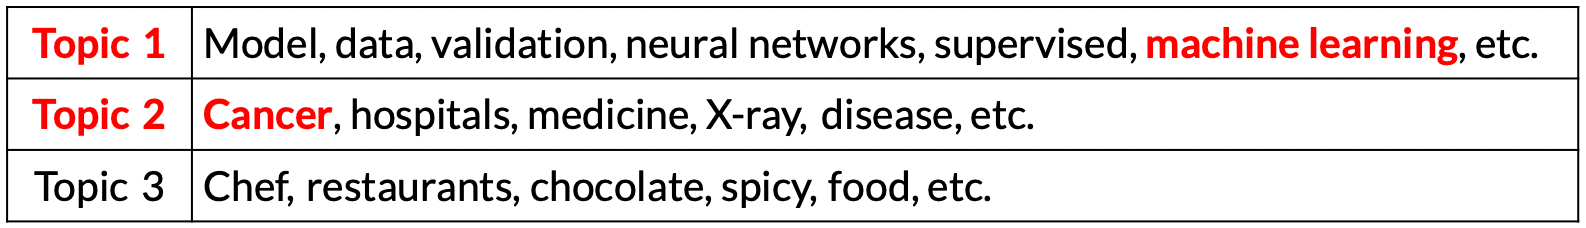

Assuming that the topic modelling algorithm has analyzed a text corpus and organized words into clusters based on their contextual relationships within documents, we observe distinct themes. Topic 1 corresponds to 'Data Science,' Topic 2 relates to 'Medicine,' and Topic 3 pertains to 'Culinary Arts.'
Given the sentence:

'Machine learning can aid and improve early detection of breast cancer.'

We can determine which topics from the aforementioned table this sentence falls under. The phrase 'machine learning' belongs to Topic 1, while 'breast cancer' falls within Topic 2. Therefore, this sentence encompasses both of these topics.
There are three primary algorithms commonly used in topic modelling:

There are three primary algorithms commonly used in topic modelling: <br>

   1. Non-negative matrix factorization <br>
   2. Latent Dirichlet allocation <br>
   3. Latent semantic analysis <br>

These algorithms form the foundation of topic modelling and are employed to extract meaningful topics from textual data.

# 1. Non-negative matrix factorization

NMF (Non-Negative Matrix Factorization) is a dimensionality reduction technique that approximates a given matrix X as the product of two non-negative matrices, usually denoted as W and H. It is commonly used for tasks such as image processing, text mining, and recommendation systems.

NMF approximates a matrix X as a product of two matrices W, H such that X ~ WH where W >=0 and H>=0.

This is done by minimising the square difference between X and W * H (also known as Frobenius Norm). This is an optimisation problem, as the equation tries to get as close to the minimum value as possible.

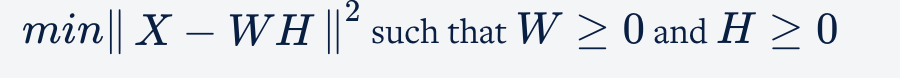


To calculate the Frobenius norm, we calculate the sum of the square of all the values of the X-WH matrix.

The formula for calculating the Frobenius norm for matrix A is as follows where m and n represent a number of rows and columns respectively.

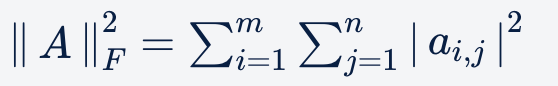

The dimensions of W, H depend on the number of topics. The original matrix X is of the size (number of documents X number of terms). This is broken down into W of the size (number of documents X number of topics) and H of the size (number of topics X number of terms).

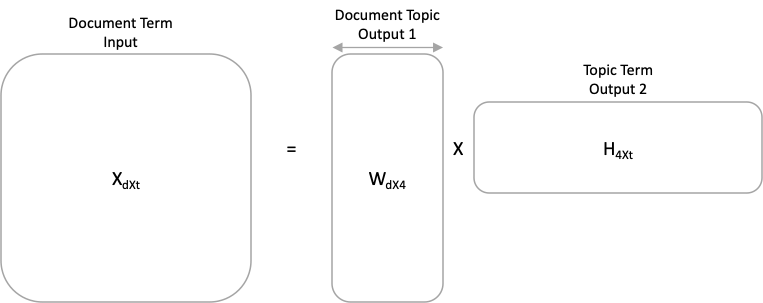

## Inferring Topics from IMDB Reviews

In [1]:
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ROOT = '/kaggle/input/large-movie-review-dataset-imdb/aclImdb/test/pos/'
reviews = []
for file in os.listdir(ROOT):
    path = os.path.join(ROOT, file)
    if os.path.isfile(path):
        with open(path, 'r') as fin:
            reviews.append(fin.read())
print(len(reviews))

12500


## Exploring the Dataset

In [3]:
for i in range(3):
    print(reviews[i])
    print('=' * 150)

I've Seen The Beginning Of The Muppet Movie, But Just The Half. Because I Only Watched It At Mrs Kelly's Friend's House. The Songs Were The Best And The Muppets Were So Hilarious. They Learn That If They Believe In The End Of The Rainbow, Anyone Can Make It, No Matter How Small, No Matter How Green(Which Was Included In The Trailer).<br /><br />Kermit Is My Favorite Protagonist(Which Means It Describes The Main Character) And So Are The Other Muppets. Mel Brooks Was Amazing When He Played Professor Max Krassman. The Scene Where Miss Piggy Saves Kermit By Doing Kung Fu On Those Guys. It Was So Cool.<br /><br />The Muppet Movie Is The Best Jim Henson Film With The Most Hilarious Characters And People Will Cherish For His Successful Film.
If it had been made 2 years later it would have been BANNED! The number one MUST SEE recommendation of the day!. The best Rouben Mamoulian film I have seen this far (have but have not yet seen J+H).<br /><br />There's no wonder why this film got less tha

## Feature Extraction

In [4]:
vect = TfidfVectorizer(stop_words='english')
X = vect.fit_transform(reviews)

pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())

,00,000,007,0079,007s,0083,00am,00o,00schneider,01,...,ïn,óli,örnek,özdemir,über,übermensch,ünel,ünfaithful,ýs,þór
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## NMF Decomposition

In [5]:
N_TOPICS = 15
nmf = NMF(n_components=N_TOPICS)
W = nmf.fit_transform(X)  # Document-topic matrix
H = nmf.components_       # Topic-term matrix

In [6]:
# Top 10 words per topic

words = np.array(vect.get_feature_names_out())
topic_words = pd.DataFrame(np.zeros((N_TOPICS, 10)), index=[f'Topic {i + 1}' for i in range(N_TOPICS)],
                           columns=[f'Word {i + 1}' for i in range(10)]).astype(str)

for i in range(N_TOPICS):
    ix = H[i].argsort()[::-1][:10]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,br,10,short,quite,end,scene,interesting,spoilers,course,spoiler
Topic 2,movie,movies,recommend,watch,seen,saw,best,watched,definitely,acting
Topic 3,film,films,director,festival,work,seen,scenes,cinema,excellent,best
Topic 4,series,episode,episodes,tv,season,television,shows,characters,doctor,mini
Topic 5,story,life,family,real,characters,people,world,true,lives,children
Topic 6,man,role,young,plays,performance,wife,character,john,scene,hitchcock
Topic 7,great,acting,cast,job,best,story,actors,10,music,wonderful
Topic 8,horror,gore,movies,films,effects,fulci,creepy,house,budget,genre
Topic 9,dvd,music,years,saw,time,video,seen,remember,copy,ve
Topic 10,love,loved,romantic,beautiful,story,romance,wonderful,girl,watch,dancing


In [7]:
# Create a topic mapping

topic_mapping = {
    'Topic 4' : 'TV',
    'Topic 5' : 'family',
    'Topic 6' : 'Martial Arts / Action',
    'Topic 10': 'romantic',
    'Topic 11': 'comedy',
    'Topic 15': 'war',
}

In [8]:
# Recall the document-topic matrix, W

W = pd.DataFrame(W, columns=[f'Topic {i + 1}' for i in range(N_TOPICS)])
W['max_topic'] = W.apply(lambda x: topic_mapping.get(x.idxmax()), axis=1)
W[pd.notnull(W['max_topic'])].head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,max_topic
3,0.000000,0.043953,0.000000,0.000046,0.046721,0.013575,0.000000,0.000000,0.000000,0.016382,0.000000,0.000000,0.006628,0.000000,0.000000,family
4,0.006063,0.009005,0.002263,0.000117,0.007078,0.024985,0.000000,0.000000,0.004834,0.000000,0.000000,0.000000,0.008439,0.000580,0.000000,Martial Arts / Action
7,0.000000,0.017978,0.031918,0.004583,0.009955,0.001838,0.005230,0.002268,0.010151,0.047025,0.002505,0.000204,0.006234,0.003176,0.001983,romantic
8,0.019315,0.000000,0.020816,0.000000,0.007750,0.041410,0.000000,0.000000,0.000000,0.000000,0.041673,0.000000,0.009806,0.000000,0.014271,comedy
9,0.000066,0.000684,0.020986,0.000000,0.000893,0.000231,0.016662,0.000000,0.007071,0.021291,0.012163,0.000789,0.016920,0.000000,0.003897,romantic
10,0.030923,0.000000,0.000000,0.035783,0.015106,0.017201,0.002612,0.000000,0.014130,0.000000,0.003552,0.000000,0.021187,0.002354,0.004175,TV
13,0.000000,0.000000,0.011533,0.000000,0.039607,0.000000,0.000002,0.000000,0.000000,0.000000,0.000287,0.000000,0.029532,0.002443,0.001976,family
19,0.029838,0.000000,0.000000,0.079675,0.017215,0.000000,0.018571,0.000000,0.000000,0.001680,0.000000,0.003441,0.012602,0.000000,0.004907,TV
22,0.000000,0.018032,0.000000,0.000000,0.024797,0.000000,0.001874,0.009590,0.007043,0.004832,0.012464,0.000000,0.006340,0.000000,0.040524,war
27,0.014823,0.003718,0.003663,0.000574,0.004197,0.030597,0.000000,0.000000,0.000000,0.008201,0.016223,0.000000,0.004211,0.002059,0.003082,Martial Arts / Action


In [9]:
reviews[22]

'With all of the "R" movies out today, it\'s hard to find something you can take the whole family to see. My kids loved it. It was good clean fun. I would highly recommend it to anyone who wants to take the whole family out for a nice evening at the movies.'

# 2.Latent Dirichlet allocation

Latent Dirichlet Allocation (LDA) is a generative statistical model used for topic modeling, which is a technique used to discover underlying topics or themes in a collection of documents. LDA assumes that each document in the collection is a mixture of different topics, and each topic is characterized by a distribution of words.
To understand how LDA works, let's consider an example with a small set of documents:

Document 1: "The cat jumped over the fence." <br>
Document 2: "The dog chased the cat."  <br>
Document 3: "The cat climbed a tree." <br>

Initialization: First, we need to define the number of topics we want to discover, let's say we set it to two. Additionally, we need to determine the number of words that are allowed in each topic, which is called the "vocabulary size." In this example, let's set the vocabulary size to four: "cat," "dog," "fence," and "tree."

Initialization of Parameters: LDA assigns two types of parameters: document-level parameters and topic-level parameters. These parameters need to be initialized. For example, we randomly assign initial probabilities to each topic for each document and each word for each topic.

Iterative Process: LDA then goes through an iterative process to improve the estimation of topic proportions and word distributions. It aims to find the most likely distribution of topics in each document and the most likely distribution of words in each topic.

Assignment of Topics: LDA starts by randomly assigning a topic to each word in each document. For example, we may assign the topic "Topic 1" to the word "cat" in Document 1, and "Topic 2" to the word "dog" in Document 2.

Topic Proportions: LDA then estimates the topic proportions for each document based on the assigned topics. It calculates the likelihood of each topic being present in a document. For example, Document 1 may have a higher proportion of Topic 1 and a lower proportion of Topic 2.

Word Distributions: LDA estimates the word distributions for each topic based on the assigned topics. It calculates the likelihood of each word belonging to a topic. For example, Topic 1 may have a higher probability of containing the words "cat" and "fence."

Reassignment of Topics: LDA iteratively reassigns topics to words in documents based on the estimated topic proportions and word distributions. This step helps refine the assignment of topics and improves the overall coherence of the model.

Convergence: LDA repeats the reassignment process multiple times until the topic proportions and word distributions stabilize, indicating convergence.
Topic Interpretation: After convergence, LDA provides a distribution of topics for each document and a distribution of words for each topic. These distributions can be interpreted to understand the underlying topics in the document collection. For example, we may find that Topic 1 is related to cats, while Topic 2 is related to dogs.

By following this iterative process, LDA uncovers the latent topics present in a collection of documents without any prior knowledge about the topics themselves. It is a valuable tool for analyzing large text datasets and extracting meaningful insights.

probabilities are calculated using Bayesian inference and the Dirichlet distribution.The probabilities in LDA are estimated through an iterative process called Gibbs sampling, which is a Markov Chain Monte Carlo (MCMC) method. Here's an explanation of how probabilities are calculated in LDA:

1. Topic Proportions: LDA calculates the topic proportions for each document. The topic proportions represent the likelihood of each topic being present in a document. The estimation of topic proportions involves counting the occurrences of each topic in the document and normalizing the counts. Specifically, for each document, the probability of a topic is calculated as:

P(topic | document) = (N(topic, document) + alpha) / (N(document) + alpha * K)

Here, N(topic, document) represents the number of times the topic appears in the document, N(document) represents the total number of words in the document, alpha is a hyperparameter that controls the overall topic sparsity, and K is the total number of topics.

The alpha hyperparameter helps balance the importance of document-specific topics (lower alpha values) versus global topics (higher alpha values). It determines the concentration of the Dirichlet prior distribution over topic proportions.

2. Word Distributions: LDA calculates the word distributions for each topic. The word distributions represent the likelihood of each word appearing in a topic. The estimation of word distributions involves counting the occurrences of each word in the topic and normalizing the counts. Specifically, for each topic, the probability of a word is calculated as:

P(word | topic) = (N(word, topic) + beta) / (N(topic) + beta * V)

Here, N(word, topic) represents the number of times the word appears in the topic, N(topic) represents the total number of words in the topic, beta is a hyperparameter that controls the overall word sparsity, and V is the vocabulary size (total number of unique words in the corpus).

The beta hyperparameter helps balance the importance of specific words (lower beta values) versus more general words (higher beta values). It determines the concentration of the Dirichlet prior distribution over word distributions.

3. Gibbs Sampling: After calculating the initial topic proportions and word distributions, LDA uses Gibbs sampling to iteratively update these probabilities. Gibbs sampling involves iteratively reassigning topics to words based on the current topic proportions and word distributions. During each iteration, LDA samples a new topic assignment for each word based on conditional probabilities.

The conditional probability of a word belonging to a topic is proportional to the product of the topic proportion for the document and the word distribution for the topic. This probability is adjusted by the normalization factor to ensure that the sum of probabilities for all topics is 1.
By repeatedly updating the topic assignments and recalculating the topic proportions and word distributions, LDA converges to a stable solution where the probabilities represent meaningful estimates of topic proportions and word distributions.

Through this process, LDA iteratively refines the probabilities for topic proportions and word distributions, capturing the underlying structure of the document collection and enabling topic discovery.



In [10]:
papers = pd.read_csv("/kaggle/input/nips-papers/papers.csv", usecols = ['id','title'])
papers.head()

,id,title
0,1,Self-Organization of Associative Database and ...
1,10,A Mean Field Theory of Layer IV of Visual Cort...
2,100,Storing Covariance by the Associative Long-Ter...
3,1000,Bayesian Query Construction for Neural Network...
4,1001,"Neural Network Ensembles, Cross Validation, an..."


## Text cleaning

In [11]:
# Here we do one simple text cleaning: convert all titles into lowercases.
# We append a new column called 'processed_title'

papers['processed_title'] = papers['title'].map(lambda x:x.lower())

papers.head()

,id,title,processed_title
0,1,Self-Organization of Associative Database and ...,self-organization of associative database and ...
1,10,A Mean Field Theory of Layer IV of Visual Cort...,a mean field theory of layer iv of visual cort...
2,100,Storing Covariance by the Associative Long-Ter...,storing covariance by the associative long-ter...
3,1000,Bayesian Query Construction for Neural Network...,bayesian query construction for neural network...
4,1001,"Neural Network Ensembles, Cross Validation, an...","neural network ensembles, cross validation, an..."


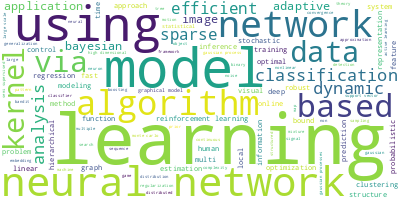

In [12]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['processed_title'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Import libraries

In [13]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization

In [14]:
# Convert a document/sentence into a list of lowercase tokens, ignoring tokens that are too short or too long.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations

## Stopwords removal

In [15]:
# remove english stop words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use']) # expand the stop word list by adding these customized words

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


In [16]:
# form a list where each element is a title
data = papers.processed_title.values.tolist()

# remove stop words and convert each title into a list of words
data_words = remove_stopwords(data)
print(data_words[0])
print(data_words[2])

['self', 'organization', 'associative', 'database', 'applications']
['storing', 'covariance', 'associative', 'long', 'term', 'potentiation', 'depression', 'synaptic', 'strengths', 'hippocampus']


##  Term document freqency

In [17]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus: a collection of documents and each document is a list of words
texts = data_words

# Convert each document into a bag-of-words (BoW) format = a list of (token_id, token_count) tuples.
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[0])
print(texts[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]
['self', 'organization', 'associative', 'database', 'applications']


## Training the model

In [18]:
from pprint import pprint
import numpy as np 

# number of topics
K = 10

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=K,alpha='asymmetric',eta=0.01)

## model output

In [19]:
for idx,topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")


Topic: 0 
Words: 0.060*"learning" + 0.025*"models" + 0.016*"stochastic" + 0.015*"optimization" + 0.011*"clustering" + 0.010*"data" + 0.010*"using" + 0.010*"model" + 0.009*"multi" + 0.008*"inference"


Topic: 1 
Words: 0.024*"networks" + 0.023*"learning" + 0.017*"visual" + 0.016*"neural" + 0.016*"dynamic" + 0.015*"bayesian" + 0.014*"inference" + 0.013*"model" + 0.013*"variational" + 0.012*"using"


Topic: 2 
Words: 0.060*"learning" + 0.032*"neural" + 0.023*"networks" + 0.020*"gaussian" + 0.017*"processes" + 0.014*"using" + 0.013*"regression" + 0.012*"model" + 0.012*"feature" + 0.010*"sparse"


Topic: 3 
Words: 0.030*"random" + 0.025*"high" + 0.024*"dimensional" + 0.023*"structured" + 0.021*"learning" + 0.019*"inference" + 0.018*"networks" + 0.015*"efficient" + 0.015*"model" + 0.013*"linear"


Topic: 4 
Words: 0.094*"neural" + 0.063*"networks" + 0.049*"network" + 0.027*"recurrent" + 0.026*"models" + 0.022*"learning" + 0.021*"optimal" + 0.019*"using" + 0.017*"training" + 0.015*"recognitio

In [20]:
doc_lda = lda_model[corpus]

# iterate through documents/titles
for i in range(len(texts)):
    docbow = corpus[i] # get the document BoW
    doc_topics = lda_model.get_document_topics(docbow,minimum_probability=0.0) # Return topic distribution for the given document BoW, as a list of (topic_id, topic_probability) 2-tuples.
    doc_topic_prob = np.array([v[1] for v in doc_topics]) # convert it into a numpy array
    if(i < 5):
        print('paper:',i+1,', dominant topic:',np.argmax(doc_topic_prob)+1) # choose the dominate topic (i.e., with the maximum topic probability among K topics)
print(".....")

paper: 1 , dominant topic: 2
paper: 2 , dominant topic: 9
paper: 3 , dominant topic: 1
paper: 4 , dominant topic: 1
paper: 5 , dominant topic: 2
.....


## model evalution

In [21]:
# Calculate and return per-word likelihood bound, using a chunk of documents as evaluation corpus.
# Also output the calculated statistics, including the perplexity=2^(-bound), to log at INFO level.

perplexity_score = lda_model.log_perplexity(corpus)
print('Perplexity score: ', perplexity_score)

Perplexity score:  -19.40596078260626


# 3. Latent semantic analysis
Latent Semantic Analysis (LSA) is a technique used in natural language processing (NLP) and information retrieval to uncover the latent (hidden) semantic structure of a collection of documents. It is based on the idea that words that are used in similar contexts tend to have similar meanings.

LSA operates on a matrix representation of the text corpus, where each row represents a document, and each column represents a unique word in the corpus. The entries of the matrix denote the frequency or presence of a word in a document. LSA applies a mathematical technique called Singular Value Decomposition (SVD) to this matrix to extract the underlying semantic relationships.

Let's consider an example to illustrate how LSA works:

Suppose we have a small collection of three documents:

Document 1: "The cat sits on the mat." <br>
Document 2: "The dog chases the cat." <br>
Document 3: "The mat is soft." <br>

First, we construct a document-term matrix where each row represents a document and each column represents a unique word:

cat   chases   dog   is   mat   on   sits   soft   the <br>
Document 1 1 0 0 0 1 1 1 0 2 <br>
Document 2 1 1 1 0 0 0 0 0 2 <br>
Document 3 0 0 0 1 1 0 0 1 1<br> 

Next, we apply Singular Value Decomposition (SVD) to this matrix, which decomposes it into three separate matrices: U, Σ, and V.
U matrix:

cat      chases    dog      is       mat      on       sits     soft     the <br>
Topic 1 -0.62 0.41 0.28 -0.35 -0.35 0.09 -0.35 0.09 0.35 <br>
Topic 2 -0.08 0.06 0.16 0.75 -0.34 0.14 0.08 0.33 -0.38 <br>
Topic 3 -0.13 -0.39 -0.67 0.11 0.47 0.26 -0.26 0.11 0.23 <br> 
Σ matrix (singular values):<br>
   2.66    0        0        0        0        0        0        0        0 <br>
   0        2.16    0        0        0        0        0        0        0 <br>
   0        0        1.41    0        0        0        0        0        0 <br>
   
V matrix (transpose of the term-word matrix): <br>
cat   chases   dog   is   mat   on   sits   soft   the <br>
Topic 1 0.05 0.27 0.14 0.50 0.51 0.14 0.05 0.35 0.49  <br>
Topic 2 0.16 0.14 0.58 -0.39 0.30 -0.14 -0.14 0.46 -0.20  <br>
Topic 3 0.33 -0.56 0.43 -0.50 0.10 0.05 -0.22 -0.06 0.23 <br>

Now, we can interpret the resulting matrices to understand the latent semantic relationships between the words and documents. The rows in the U matrix represent the topics or concepts, and the columns represent the words. The values in the U matrix indicate the strength of association between the topics and the words. Similarly, the rows in the V matrix represent the topics, and the columns represent the documents. The values in the V matrix indicate the strength of association between the topics and the documents.

By applying LSA, we can determine that "cat" and "dog" are associated with Topic 1, "mat" is associated with both Topic 1 and Topic 2, and "is" is associated with Topic 2. Furthermore, Document 1 is associated with Topic 1, Document 2 is associated with both Topic 1 and Topic 2, and Document 3 is associated with Topic 2.

LSA enables us to reduce the dimensionality of the document-term matrix, uncover hidden semantic relationships, and perform various NLP tasks such as document clustering, information retrieval, and text summarization.


In [22]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(X)

In [23]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 0.21231782  0.00359023 -0.01482851 ... -0.01184744 -0.04349466
  -0.03682041]
 [ 0.21145049  0.01267048  0.05013284 ...  0.04208106 -0.05829246
   0.00411897]
 [ 0.1456884   0.04601537  0.03089189 ... -0.04532303  0.00799688
  -0.00364917]
 ...
 [ 0.27418662  0.01784322 -0.08162499 ...  0.07140247 -0.03315591
   0.00961625]
 [ 0.1735923   0.03557269 -0.00768344 ... -0.02393931  0.0140155
  -0.01995885]
 [ 0.24894435 -0.01759537 -0.1017941  ... -0.09300252 -0.01309382
  -0.04455766]]
(12500, 10)


In [24]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
    print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  21.23178243452265
Topic  1  :  0.35902344013421544
Topic  2  :  -1.4828505350448746
Topic  3  :  -1.5984235119109027
Topic  4  :  0.6639681486505052
Topic  5  :  3.4867680591115073
Topic  6  :  1.6144417836046783
Topic  7  :  -1.1847442053638424
Topic  8  :  -4.349465999257521
Topic  9  :  -3.682041261363309


In [25]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 54300)
[[ 2.25243467e-03  3.94288884e-03  1.59519663e-03 ...  5.09086462e-05
   6.06325203e-05  1.05797478e-04]
 [-1.10235387e-03  1.56966751e-04 -3.03547980e-04 ...  5.00663290e-05
  -2.26452868e-04 -3.39963881e-04]
 [-2.07492651e-03  3.11946429e-03  3.30719628e-04 ...  3.14251247e-06
   8.39215795e-05  6.64865221e-04]
 ...
 [ 2.74735031e-03  3.76078578e-03  1.04112264e-03 ... -1.49202213e-04
   2.69078701e-04 -1.43305466e-03]
 [-4.35971534e-03 -6.22433787e-03 -4.06848987e-03 ...  1.32808656e-04
  -1.91193794e-04  1.82290314e-04]
 [-2.44864465e-03 -3.27347336e-03 -2.54664083e-03 ... -1.31474650e-04
   2.75698114e-04 -6.52894399e-04]]


In [26]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
br movie film like good great just really story time 

Topic 1: 
br kahn match episodes episode spoilers chaser oppenheimer uk bbc 

Topic 2: 
film films war director story man work life young characters 

Topic 3: 
series episode tv episodes like just season shows funny time 

Topic 4: 
horror good film really funny fun films don 10 like 

Topic 5: 
film love watch think just people saw dvd watched know 

Topic 6: 
great series best dvd music cast excellent tv wonderful acting 

Topic 7: 
series horror movie dvd seen years war tv films effects 

Topic 8: 
story series really good characters episode character acting people book 

Topic 9: 
love horror story great music movies really 10 beautiful loved 



# END